In [5]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa

In [2]:
from PIL import Image
from pathlib import Path
import os
import datetime

In [3]:
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
#from pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from PIL import Image

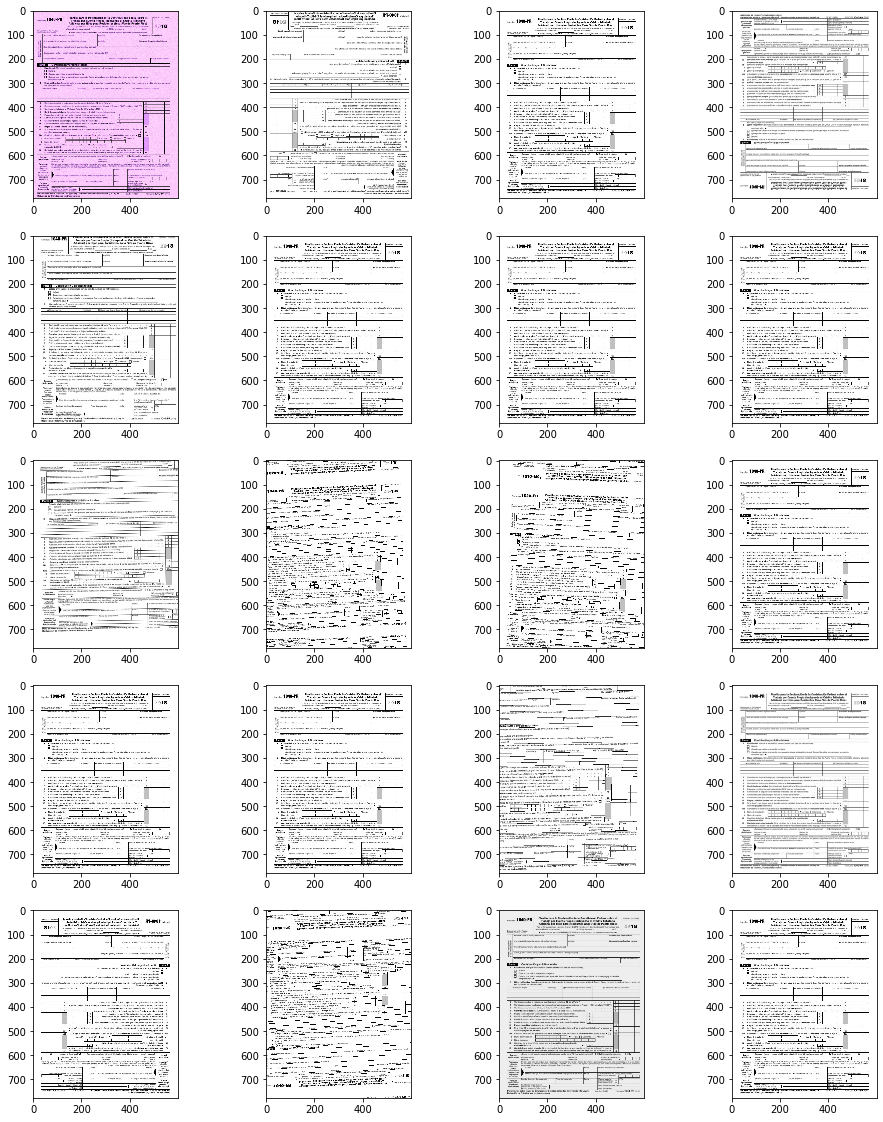

In [54]:
w=10
h=10
fig=plt.figure(figsize=(16, 20))
columns = 4
rows = 5
for i in range(1, 21):
    fig.add_subplot(rows, columns, i)
    plt.imshow(imagelist_aug[i-1])
plt.show()

In [46]:
ifn=1
for img in imagelist_aug:
    fn="1040PR/gen/gen"+"_"+str(ifn)+'.png'
    Image.fromarray(img).save(fn,'PNG')
    ifn=ifn+1

In [4]:
from pdf2image import convert_from_path, convert_from_bytes
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)

In [6]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
class PipeLine:
    def __init__(self):
        print("create Image Augumnetation pipe line")
    def default(self):
        seq = iaa.SomeOf((0,3),
            [
        #
        # Apply the following augmenters to most images.
        #
        iaa.Fliplr(0.1), # horizontally flip 50% of all images
        iaa.Flipud(0.1), # vertically flip 20% of all images

        # crop some of the images by 0-10% of their height/width
        sometimes(iaa.Crop(percent=(0, 0.05))),

        # Apply affine transformations to some of the images
        # - scale to 80-120% of image height/width (each axis independently)
        # - translate by -20 to +20 relative to height/width (per axis)
        # - rotate by -45 to +45 degrees
        # - shear by -16 to +16 degrees
        # - order: use nearest neighbour or bilinear interpolation (fast)
        # - mode: use any available mode to fill newly created pixels
        #         see API or scikit-image for which modes are available
        # - cval: if the mode is constant, then use a random brightness
        #         for the newly created pixels (e.g. sometimes black,
        #         sometimes white)
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
            rotate=(-3, 3),
            shear=(-3, 3),
            order=[0, 1],
            cval=(0, 255),
            mode=ia.ALL
        )),

        #
        # Execute 0 to 5 of the following (less important) augmenters per
        # image. Don't execute all of them, as that would often be way too
        # strong.
        #
        iaa.SomeOf((0, 2),
            [
                # Convert some images into their superpixel representation,
                # sample between 20 and 200 superpixels per image, but do
                # not replace all superpixels with their average, only
                # some of them (p_replace).

                # Blur each image with varying strength using
                # gaussian blur (sigma between 0 and 3.0),
                # average/uniform blur (kernel size between 2x2 and 7x7)
                # median blur (kernel size between 3x3 and 11x11).
                iaa.OneOf([
                    iaa.GaussianBlur((0, 1.0)),
                    iaa.AverageBlur(k=(1, 3)),
                    iaa.MedianBlur(k=(1, 5)),
                ]),

                # Sharpen each image, overlay the result with the original
                # image using an alpha between 0 (no sharpening) and 1
                # (full sharpening effect).
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),

                # Same as sharpen, but for an embossing effect.
                iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),

                # Search in some images either for all edges or for
                # directed edges. These edges are then marked in a black
                # and white image and overlayed with the original image
                # using an alpha of 0 to 0.7.
                sometimes(iaa.OneOf([
                    iaa.EdgeDetect(alpha=(0, 0.7)),
                    iaa.DirectedEdgeDetect(
                        alpha=(0, 0.7), direction=(0.0, 1.0)
                    ),
                ])),

                # Add gaussian noise to some images.
                # In 50% of these cases, the noise is randomly sampled per
                # channel and pixel.
                # In the other 50% of all cases it is sampled once per
                # pixel (i.e. brightness change).
                iaa.AdditiveGaussianNoise(
                    loc=0, scale=(0.0, 0.05*255), per_channel=0.5
                ),


                # Add a value of -10 to 10 to each pixel.
                iaa.Add((-1, 1), per_channel=0.5),

                # Change brightness of images (50-150% of original value).
                iaa.Multiply((0.5, 1.5), per_channel=0.5),

                # Improve or worsen the contrast of images.
                iaa.contrast.LinearContrast((0.5, 1.0), per_channel=0.3),

                # Convert each image to grayscale and then overlay the
                # result with the original with random alpha. I.e. remove
                # colors with varying strengths.
                iaa.Grayscale(alpha=(0.0, 1.0)),

                # In some images move pixels locally around (with random
                # strengths).
                sometimes(
                    iaa.ElasticTransformation(alpha=(0.05, 0.1), sigma=0.05)
                ),

                # In some images distort local areas with varying strength.
                sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05)))
            ],
            # do all of the above augmentations in random order
            random_order=True
        )
        ],
        # do all of the above augmentations in random order
        random_order=True
        )
        return seq
class PDFImageGenerator:
    # pdffile: original pdf file location
    # formname: classification label name. each page will be formname_#page
    # pdfout: output PDF images
    # genout generated augment images
    def __init__(self,pdffile,formname,imageRoot):
        self.pdf=pdffile
        self.formname=formname
        self.imageRoot=imageRoot
    
    def createfolder(self,folderpath):
        Path(folderpath).mkdir(parents=True, exist_ok=True)
    
    def createPDFImages(self):
        # first read the PDF
        images = convert_from_path(self.pdf,size=(512,None))
        return images
    
    def getpdfImageFolder(self,seq):
        pdfout=self.imageRoot+"/pdf/"+self.formname+"_page_"+str(seq)
        return pdfout
    
    def getgenImageFolder(self,seq):
        genout=self.imageRoot+"/gen/"+self.formname+"_page_"+str(seq)
        return genout
    def generatePDFImage(self,images):
        for seq in range(len(images)):
            folder=self.getpdfImageFolder(seq+1)
            self.createfolder(folder)
            fn=folder+"/"+self.formname+"_page_"+str(seq+1)+".png"
            images[seq].save(fn,'PNG')
            
    #input is PIL images
    def genateAugmentImage(self,images,pipeline,batchsize):
        for seq in range(len(images)):
            folder=self.getgenImageFolder(seq+1)
            self.createfolder(folder)
            # now build sample images
            imgs_input=[]
            npimg=np.asarray(images[seq])
            for i in range(batchsize):
                imgs_input.append(npimg)
            imgs_aug=pipeline(images=imgs_input)
            # now saving the images
            for fseq in range(len(imgs_aug)):
                fn=folder+"/"+self.formname+"_page_"+str(seq+1)+"_"+str(fseq+1)+".png"
                Image.fromarray(imgs_aug[fseq]).save(fn,"PNG")
    
    def buildAll(self,pipeline,batchsize):
        _imgs=self.createPDFImages()
        self.generatePDFImage(_imgs)
        self.genateAugmentImage(_imgs,pipeline,batchsize)

In [7]:
pdfcfgs=[]
print(datetime.datetime.now())
for r,d,flist in os.walk('newformpdfs'):
    for f in flist:
        if("1988" in str(f)):
            pdfcfgs.append({"filename":"newformpdfs/"+str(f),'form':f[:-4],'imagefolder':'imagedata/1988'})

2020-02-27 13:28:46.860642


In [8]:
len(pdfcfgs)

149

In [9]:
pline=PipeLine()
i=0
for cfg in pdfcfgs:
    print(datetime.datetime.now(),cfg)
    if(i%20==0):
        print("---->processing forms:",i)
    pgen=PDFImageGenerator(cfg['filename'],cfg['form'],cfg['imagefolder'])
    pgen.buildAll(pline.default(),150)
    i=i+1
print("done:..",i)

create Image Augumnetation pipe line
2020-02-27 13:29:44.021070 {'filename': 'newformpdfs/f8609--1988.pdf', 'form': 'f8609--1988', 'imagefolder': 'imagedata/1988'}
---->processing forms: 0
2020-02-27 13:30:04.027890 {'filename': 'newformpdfs/f8453--1988.pdf', 'form': 'f8453--1988', 'imagefolder': 'imagedata/1988'}
2020-02-27 13:30:11.476516 {'filename': 'newformpdfs/f1099b--1988.pdf', 'form': 'f1099b--1988', 'imagefolder': 'imagedata/1988'}
2020-02-27 13:30:32.619118 {'filename': 'newformpdfs/f8302--1988.pdf', 'form': 'f8302--1988', 'imagefolder': 'imagedata/1988'}
2020-02-27 13:30:40.033605 {'filename': 'newformpdfs/f1118--1988.pdf', 'form': 'f1118--1988', 'imagefolder': 'imagedata/1988'}
2020-02-27 13:30:50.460829 {'filename': 'newformpdfs/f1120pol--1988.pdf', 'form': 'f1120pol--1988', 'imagefolder': 'imagedata/1988'}
2020-02-27 13:31:14.600863 {'filename': 'newformpdfs/f1099msc--1988.pdf', 'form': 'f1099msc--1988', 'imagefolder': 'imagedata/1988'}
2020-02-27 13:31:34.123455 {'filena

In [32]:
import pandas as pd
df_cfgs=pd.DataFrame(pdfcfgs)
df_cfgs.to_csv('pipeline_cfg.csv')

In [112]:
pgen.buildAll(pline.default(),2)

In [11]:
from requests import get
from urllib.parse import urljoin
from os import path, getcwd
from bs4 import BeautifulSoup as soup
from sys import argv
from time import sleep

In [2]:
def get_page(base_url):
    req= get(base_url)
    if req.status_code==200:
        return req.text
    raise Exception('Error {0}'.format(req.status_code))

In [16]:
def get_all_links(html):
    bs= soup(html)
    links= bs.findAll('a')
    return links

def get_pdf(base_url, base_dir):
    eles=[]
    html= get_page(base_url)
    links= get_all_links(html)
    if len(links)==0:
        raise Exception('No links found on the webpage')
    n_pdfs= 0
    for link in links:
        if link['href'][-4:]=='.pdf':
            n_pdfs+= 1
            content= get(urljoin(base_url, link['href']))
           # print(content)
            vstr=link['href']
            fn_pdf=vstr[vstr.rindex("/")+1:]
            if content.status_code==200 and content.headers['content-type']=='application/pdf':
                with open(path.join(base_dir, fn_pdf), 'wb') as pdf:
                    pdf.write(content.content)
                    pdf.flush()
                    pdf.close()
                    eles.append({"form":link.text,"file":fn_pdf})
    if n_pdfs==0:
        raise Exception('No pdfs found on the page')
    print ("pdfs downloaded and saved in ",n_pdfs)
    return eles
def makeUrl(seq):
    url="https://apps.irs.gov/app/picklist/list/formsPublications.html?resultsPerPage=50&sortColumn=sortOrder&indexOfFirstRow="+str(seq)+"&criteria=formNumber&value=form&isDescending=false"
    return url

In [19]:
all_eles=[]
for i in range(0,1020,50):
    urlstr=makeUrl(i)
    eles=get_pdf(urlstr,'formpdfs/')
    all_eles.extend(eles)
    print("loading page:",i)
    sleep(2)

pdfs downloaded and saved in  50
loading page: 0
pdfs downloaded and saved in  50
loading page: 50
pdfs downloaded and saved in  50
loading page: 100
pdfs downloaded and saved in  50
loading page: 150
pdfs downloaded and saved in  50
loading page: 200
pdfs downloaded and saved in  50
loading page: 250
pdfs downloaded and saved in  50
loading page: 300
pdfs downloaded and saved in  50
loading page: 350
pdfs downloaded and saved in  50
loading page: 400
pdfs downloaded and saved in  50
loading page: 450
pdfs downloaded and saved in  50
loading page: 500
pdfs downloaded and saved in  50
loading page: 550
pdfs downloaded and saved in  50
loading page: 600
pdfs downloaded and saved in  50
loading page: 650
pdfs downloaded and saved in  50
loading page: 700
pdfs downloaded and saved in  50
loading page: 750
pdfs downloaded and saved in  50
loading page: 800
pdfs downloaded and saved in  50
loading page: 850
pdfs downloaded and saved in  50
loading page: 900
pdfs downloaded and saved in  50
l

In [18]:
all_eles

[{'form': 'Form 11-C', 'file': 'f11c.pdf'},
 {'form': 'Form 23', 'file': 'f23.pdf'},
 {'form': 'Form 56', 'file': 'f56.pdf'},
 {'form': 'Form 56-F', 'file': 'f56f.pdf'},
 {'form': 'Form 211', 'file': 'f211.pdf'},
 {'form': 'Form 211-A', 'file': 'f211a.pdf'},
 {'form': 'Form 433-A', 'file': 'f433a.pdf'},
 {'form': 'Form 433-A (OIC)', 'file': 'f433aoi.pdf'},
 {'form': 'Form 433-A (SP)', 'file': 'f433asp.pdf'},
 {'form': 'Form 433-B', 'file': 'f433b.pdf'},
 {'form': 'Form 433-B (OIC)', 'file': 'f433boi.pdf'},
 {'form': 'Form 433-B (SP)', 'file': 'f433bsp.pdf'},
 {'form': 'Form 433-D', 'file': 'f433d.pdf'},
 {'form': 'Form 433-D (SP)', 'file': 'f433dsp.pdf'},
 {'form': 'Form 433-F', 'file': 'f433f.pdf'},
 {'form': 'Form 433-F (SP)', 'file': 'f433fsp.pdf'},
 {'form': 'Form 433-H', 'file': 'f433h.pdf'},
 {'form': 'Form 433-H (SP)', 'file': 'f433hsp.pdf'},
 {'form': 'Form 461', 'file': 'f461.pdf'},
 {'form': 'Form 637', 'file': 'f637.pdf'},
 {'form': 'Form 656', 'file': 'f656.pdf'},
 {'form':

In [20]:
print (len(all_eles))

1022


In [23]:
import pandas as pd
df=pd.DataFrame(all_eles)
df.to_csv("irs_form.csv")

In [24]:
df

,form,file
0,Form 11-C,f11c.pdf
1,Form 23,f23.pdf
2,Form 56,f56.pdf
3,Form 56-F,f56f.pdf
4,Form 211,f211.pdf
...,...,...
1017,Form W-8EXP,fw8exp.pdf
1018,Form W-8IMY,fw8imy.pdf
1019,Form W-9,fw9.pdf
1020,Form W-9 (SP),fw9sp.pdf
